In [3]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy
import torch

In [4]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy.stats import mode
from collections import Counter

In [46]:
SAMPLE_RATE = 22050
def extract_features(data):
    train = []
    for sound in data:
        features = []
        # mfcc
        mfcc = librosa.feature.mfcc(sound, sr=SAMPLE_RATE, n_mfcc=13)
#         mfcc = np.ravel(mfcc)
        mfcc = np.mean(mfcc, axis=1)
#         print (mfcc.shape)
        features.extend(mfcc)
        
#         # stft
#         stft = np.abs(librosa.core.stft(sound))
#         chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=SAMPLE_RATE),axis=1)
#         features.extend(chroma)
        
        train.append(features)
    train = np.array(train)
#     print ("train shape: ", train.shape)
    return train

In [8]:
df_test = pd.read_csv("test.csv", header=None)
df_test = df_test.as_matrix()
X_test = df_test[:,1:]  # removes ID column

In [333]:
df_test.shape

(1000, 88201)

In [48]:
"""
Read in train and test as Pandas DataFrames
"""
# nrows = 2000
# df_train = pd.read_csv("train.csv", nrows = nrows, header=None)

# later on, we can process chunks using chunkiter
chunksize = 100
n_features = 13
full_train = np.zeros((0, 13))  # to stack under later
full_val = np.zeros((0, 13))
full_train_y = []
full_val_y = []

for chunk in pd.read_csv("train.csv", chunksize=chunksize, header=None):
    # df_test.head()
    # print (split)
    chunk = chunk.as_matrix()
    
    train_set, val = train_test_split(chunk, train_size = 0.8)
#     print ("train set shape: ", train_set.shape)
#     print ("val set shape: ", val.shape)
    
    X_train = train_set[:,:-1]  # all except last column
    Y_train = train_set[:,-1]  # last column
    
    X_val = val[:,:-1]  # all except last column
    Y_val = val[:,-1]  # last column
    
    train = extract_features(X_train)  # should be (400 * n_features)
    validation = extract_features(X_val)   # should be (100 * n_features)
    
    full_train = np.concatenate((full_train, train), axis=0)
    full_val = np.concatenate((full_val, validation), axis=0)
    
    full_train_y.extend(Y_train)
    full_val_y.extend(Y_val)  # DOUBLE CHECK THIS

    print ("full train shape: ", full_train.shape)
    print ("full val shape: ", full_val.shape)
    
    if (full_train.shape[0] >= 1000):  # truncate so don't have to read in full dataset - comment out if desired
        break
    
#     print ("full train y: ", full_train_y)
#     print ("full val y: ", full_val_y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


full train shape:  (80, 13)
full val shape:  (20, 13)
full train shape:  (160, 13)
full val shape:  (40, 13)
full train shape:  (240, 13)
full val shape:  (60, 13)
full train shape:  (320, 13)
full val shape:  (80, 13)
full train shape:  (400, 13)
full val shape:  (100, 13)
full train shape:  (480, 13)
full val shape:  (120, 13)
full train shape:  (560, 13)
full val shape:  (140, 13)
full train shape:  (640, 13)
full val shape:  (160, 13)
full train shape:  (720, 13)
full val shape:  (180, 13)
full train shape:  (800, 13)
full val shape:  (200, 13)
full train shape:  (880, 13)
full val shape:  (220, 13)
full train shape:  (960, 13)
full val shape:  (240, 13)
full train shape:  (1040, 13)
full val shape:  (260, 13)
full train shape:  (1120, 13)
full val shape:  (280, 13)
full train shape:  (1200, 13)
full val shape:  (300, 13)
full train shape:  (1280, 13)
full val shape:  (320, 13)
full train shape:  (1360, 13)
full val shape:  (340, 13)
full train shape:  (1440, 13)
full val shape:  (

In [52]:
full_val.shape
full_train.shape

(5060, 13)

In [53]:
def acc(preds, t_validate):
    return np.sum(preds == np.array(t_validate)) / len(preds)

In [54]:
# just a sample - extracting MFCC from the first couple audio files
SAMPLE_RATE = 22050
feats = extract_features(X_train[0:2])
print (feats.shape)
print (feats)
# librosa.display.specshow(feats, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()

(2, 13)
[[-265.20087801   81.48429541  -30.36452137    8.35875168  -16.53819251
    19.56379054  -10.72928118   13.43788298   -9.39687066    0.6771964
     3.92959339   22.03269777    0.93450028]
 [-161.34348622   94.55473752   -2.20670301   19.25692971   -0.7633389
    17.63542521   -2.7551204    12.2298031    -0.65269488   21.3884758
     0.42293167    0.49652004  -13.11657682]]


In [34]:
# train = extract_features(X_train)
# validation = extract_features(X_val) 
test = extract_features(X_test)

train shape:  (1000, 13)


In [92]:
print (train.shape)
print ("learning...")
clf = RandomForestClassifier(n_estimators=100)
clf.fit(full_train, full_train_y)

(20, 13)
learning...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
log_clf = LogisticRegression()
log_clf.fit(full_train, full_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(full_train, full_train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [58]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(2000))
mlp_clf.fit(full_train, full_train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2000, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [93]:
rf_pred = clf.predict(full_val)
# print (rf_pred)
print ("rf acc: ", acc(rf_pred, full_val_y))

log_pred = log_clf.predict(full_val)
# print (log_pred)
print ("log acc: ", acc(log_pred, full_val_y))

gb_pred = gb_clf.predict(full_val)
print ("gb acc: ", acc(gb_pred, full_val_y))

mlp_pred = mlp_clf.predict(full_val)
print ("mlp acc: ", acc(mlp_pred, full_val_y))

rf acc:  0.926482213439
log acc:  0.754940711462
gb acc:  0.869565217391
mlp acc:  0.901185770751


In [94]:
# pick plurality vote among multiple predictors
def ensemble_pred(preds):
    return mode(preds)[0][0]

ensemble = np.array([rf_pred, log_pred, gb_pred, mlp_pred])
en_pred = ensemble_pred(ensemble)
print ("ens val acc: ", acc(en_pred, mlp_pred))

ens val acc:  0.925691699605


In [72]:
# trying to predict on the test set
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i) + "," + str(int(p)) + "\n")

log_preds_f = log_clf.predict(test)
rf_preds_f = clf.predict(test)
mlp_preds_f = mlp_clf.predict(test)
gb_preds_f = gb_clf.predict(test)
cnn_pred_f = np.loadtxt('CNN_2.csv', skiprows=1, usecols=1, delimiter=',')  # includes Thomas's CNN predictions

ensemble = np.array([rf_preds_f, log_preds_f, gb_preds_f, mlp_preds_f, cnn_pred_f])
en_preds_f = ensemble_pred(ensemble)
write_to_file("pred.csv", en_preds_f)

In [81]:
idx=np.random.choice(1000,size=13)
ensemble[:,idx]

array([[ 0.,  9.,  4.,  0.,  4.,  2.,  2.,  9.,  4.,  4.,  3.,  8.,  4.],
       [ 0.,  5.,  3.,  2.,  4.,  0.,  3.,  7.,  4.,  4.,  3.,  8.,  3.],
       [ 0.,  0.,  3.,  4.,  4.,  0.,  3.,  9.,  4.,  4.,  8.,  8.,  3.],
       [ 9.,  5.,  3.,  4.,  4.,  2.,  3.,  9.,  4.,  4.,  3.,  8.,  3.],
       [ 0.,  0.,  0.,  4.,  4.,  0.,  2.,  5.,  4.,  8.,  3.,  8.,  0.]])

In [83]:
print (X_test.shape)
testing = (np.sum(X_test, axis=1))
zeroes = np.where(testing == 0)[0]
print (len(zeroes))
print (en_preds_f[zeroes])

en_preds_f[zeroes] = 0  # sets all the zeroes to 0
write_to_file("pred.csv", en_preds_f)

print (Counter(en_preds_f))

(1000, 88200)
147
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]
Counter({0.0: 355, 2.0: 137, 4.0: 109, 3.0: 100, 8.0: 74, 7.0: 71, 9.0: 66, 5.0: 64, 1.0: 21, 6.0: 3})


# Listening to the audio
This code enables you to listen to a sample sine wave audio.

In [95]:
SAMPLE_RATE = 22050


In [96]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)
ipd.Audio(signal, rate=SAMPLE_RATE)

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [23]:
# Just some re-shaping and dimension finding
N = 1
print ("N:",N)
train = signal[np.newaxis,:]
print ("Train shape",train.shape)
N_train = train.shape[0]
NUM_SAMPLES = train.shape[1]-1

X_train = train[:,:-1]
y_train = train[:,-1]
y_train = y_train.reshape(N_train,1)

N: 1
Train shape (1, 88200)


In [24]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [25]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [26]:
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print (test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168, 173)


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [27]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
#np.save('Data/xtrain_spec', tmp_train)

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


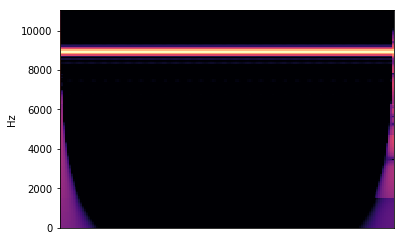

In [28]:
librosa.display.specshow(tmp_train[0], y_axis='hz')

In [21]:
print (tmp_train.shape)

(1, 168, 173)
